In [27]:
from disp_agp_solver import Instance, DispAgpSolver, DispAgpSolverObserver
from typing import List, Tuple, Any
from pyvispoly import plot_polygon, Point, Polygon
import matplotlib.pyplot as plt
import os
import typing

In [28]:
# Plotting the solution process
class MyObserbver(DispAgpSolverObserver):
    def __init__(self, instance, save_to: typing.Optional[str]=None, filetype="pdf") -> None:
        super().__init__()
        self.instance = instance
        if save_to is not None:
            os.makedirs(save_to, exist_ok=True)
        self._save_to = save_to
        self.filetype = filetype
        self.i = 0

    def _save(self, name):
        if self._save_to is not None:
            # up to 3 digits
            plt.savefig(os.path.join(self._save_to, f"{self.i:03d}_{name}.{self.filetype}"))
        self.i += 1
        

    def on_coverage_iteration(self, guards: List[int], witnesses: List[Tuple[Any, List[int]]], missing_areas: List):
        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        plt.title("Adding "+str(len(witnesses))+" witnesses")
        plot_polygon( self.instance.as_cgal_polygon(), color="lightblue", ax=ax)
        for area in missing_areas:
            plot_polygon(area, color="red", ax=ax, alpha=0.3)
        for guard in guards:
            ax.plot([self.instance.positions[guard][0]], [self.instance.positions[guard][1]], 'bo')
        for witness, covering_guards in witnesses:
            for covering_guard in covering_guards:
                ax.plot([self.instance.positions[covering_guard][0], float(witness.x())], [self.instance.positions[covering_guard][1], float(witness.y())], 'r--', lw=0.5)
            ax.plot([float(witness.x())], [float(witness.y())], 'x', color="darkred")
        self._save("coverage_iteration")
        plt.show()
    
    def on_new_solution(self, guards: List[int], objective: float, closest_pair: Tuple[int, int], witnesses: List[Tuple[Any, List[int]]]):
        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        plt.title("Objective: " + str(objective) )
        plot_polygon( self.instance.as_cgal_polygon(), color="lightblue", ax=ax)
        for witness, covering_guards in witnesses:
            ax.plot([float(witness.x())], [float(witness.y())], 'x', color="grey")
        for guard in guards:
            if guard not in closest_pair:
                ax.plot([self.instance.positions[guard][0]], [self.instance.positions[guard][1]], 'bo')
            else:
                ax.plot([self.instance.positions[guard][0]], [self.instance.positions[guard][1]], 'ro')
        self._save("new_solution")
        plt.show()

In [29]:
boundary = [(0, 0), (8, 0), (9,4), (12, 4), (10, 7), (10, 10), (0, 10),]
holes = [[(3,3), (3,8), (8,8),(7,7), (8,3), (4,5)], [(1,1), (1,2), (2,2), (2,1)]]
positions = boundary+sum(holes, [])
indices_boundary = list(range(len(boundary)))
indices_holes = []
for hole in holes:
    n = len(indices_boundary)+sum(len(h) for h in indices_holes)
    indices_holes.append(list(range(n, n+len(hole))))
instance = Instance(positions, indices_boundary, indices_holes)

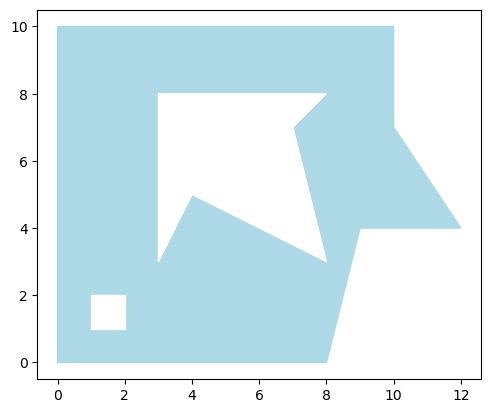

In [30]:
from pyvispoly import plot_polygon
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_aspect('equal')
plot_polygon( instance.as_cgal_polygon(), color="lightblue", ax=ax)
plt.show()

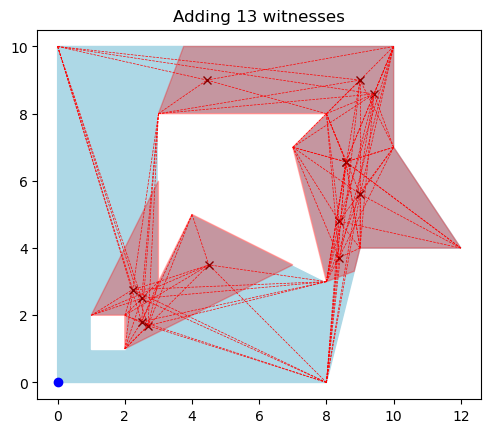

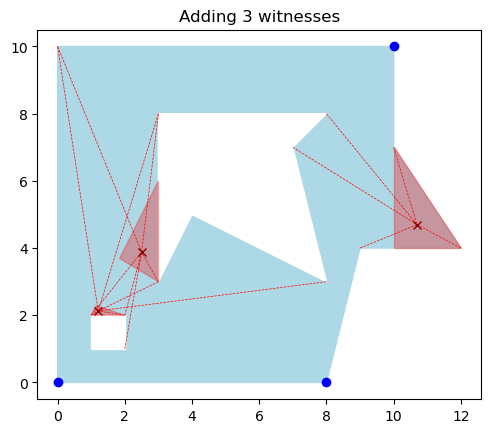

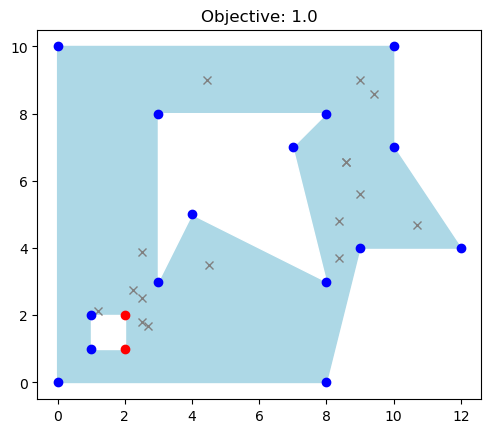

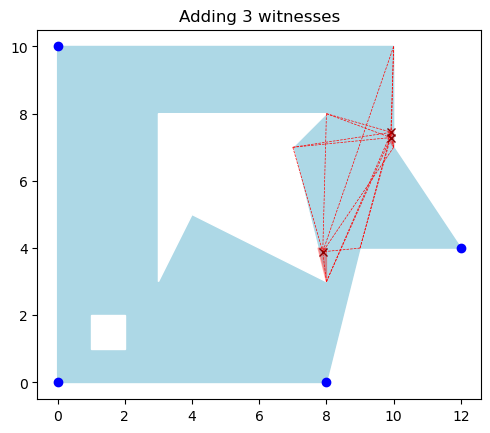

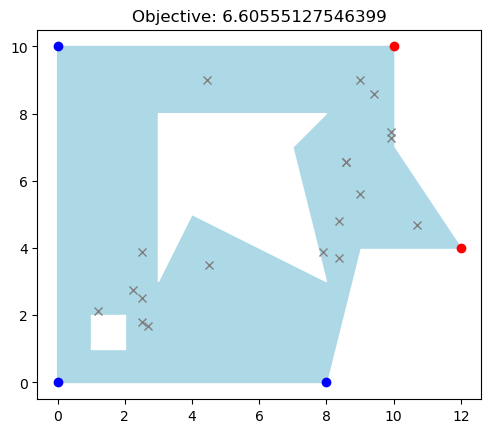

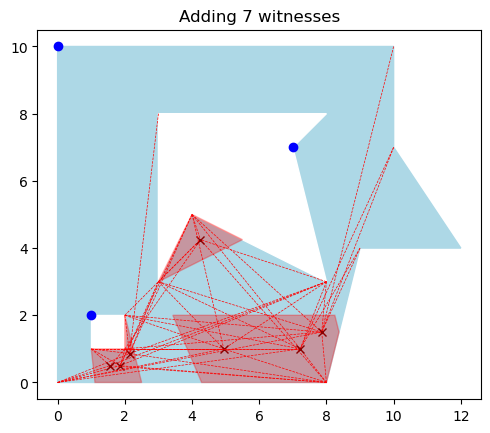

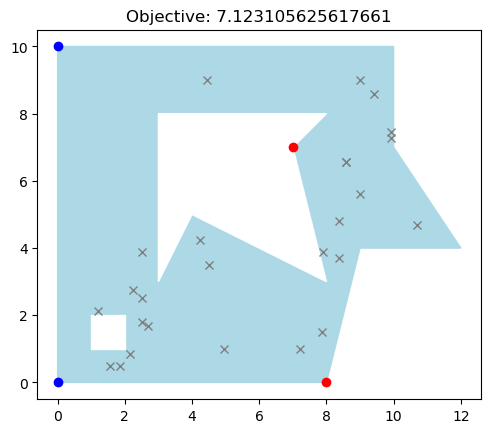

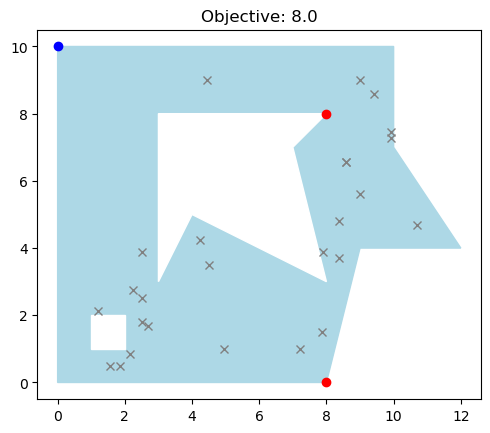

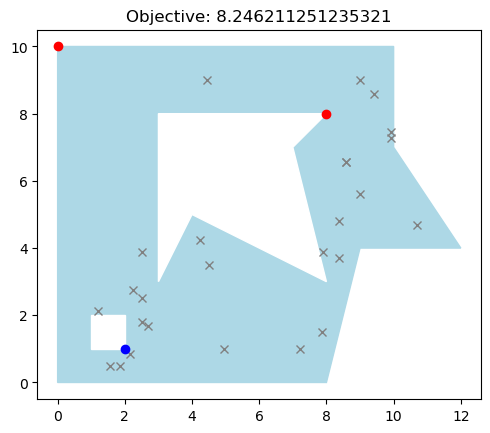

Guards [6, 10, 16] Distance 9.246211251235321


In [31]:

solver = DispAgpSolver(instance)
solver.observer = MyObserbver(instance, "example_iterations", "png")
solver.optimize()
print("Guards", solver.guards, "Distance", solver.objective)